# Group Assignment 4: Draft Final Data

## Team: Olivia Arena, Deja McCauley, Lindsey Morris, Cassie Truong ##

This notebook is the **housing section** of our group project on Logan Neighborhood in Philadelphia, PA. This revised note book addresses three different requirements for Week 7's group assignment: 

1) Narrows the scope of our research question
2) Cleans up the code used in the housing portion of the midterm assignment 
3) Attempts to make an isochrome map

**First:** Our revised research question is: *In terms of social infrastructure and the built environment, what community needs emerge as a priority for North Philadelphia’s Logan Neighborhood that could be addressed through the redevelopment of the Logan Triangle?*

**Second:** Yoh provided helpful feedback on the technical aspects of our midterm assignment, which included a recommendation to streamline our code by reading in just one dataset for all of Philadelphia and then subsetting the six tracts that make up the Logan Neighborhood, which are 42101028000, 42101028100, 42101028200, 42101028300, 42101028400, 42101028500. Yoh also recommended that we create an outline around Logan to include on all our maps of the larger Philadelphia area. We wanted to standardize this outline across the cloropleth maps. 

**Third:** I am going to try to better clean some of the data in the Affordable Housing Developments dataset and then create a walkshed around housing projects in Logan to see how accessible the Logan Triangle is from housing investments. 

## Overview ##
In conducting my initial visualizations of housing trends, I merge Census data and bring together housing variables and tract data for mapping. These data explore the current housing conditions in and around the Logan Triangle area of Philadelphia. Data are pulled from Census data via Social Explorer and the Philadelphia Open Data Portal. The two datasets include housing indicators from the ACS 5-Year Estimates (2017-2021) and a dataset of affordable housing projects financed by the Department of Housing and Community Development from 1994-2019. The priorities for this post-midterm update is to consolidate some of the coding steps, create visuals with a consistent color scheme, clear distinctions between Logan and Philadelphia to help with comparison (through the creation of a boundary), and layer to begin to add depth to our analysis. Some of the elements that this included are:


- **First** , I read in the first dataset of housing indicators for all the census tracts that make up all of Philadelhpia.

- **Step 2** , I read in a data from the Philadelphia census tracts with geometries on FIPS codes (downloaded from the Philadelphia Open Data Portal), bringing the geometries together with downloaded housing indicator output.

- **Step 3**, I join these two datasets together on FIPS codes to be able to map data. 

- **Step 4**, I do exploration of the dataset to get a sense of it. I begin to make maps that compare the Logan Neighborhood to the larger Philadelphia area to get a sense of comparisons. 


#### Data Visualizations ####

- **Static Maps** of home values with the Logan tracts outlined against all of Philadelphia
- **Bar chart** with the type of projects for comparison
- **Static Maps** with affordable housing projects from 25 years broken out by type 
- **Interactive Maps** with the rent data and project data overlaid and coded by type of project
- Isochrome map with walksheds around housing projects


## Data Investigation ##
Our first step is to import the libraries that we need to use.

In [51]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
import geopy
dir(geopy)
from geopy.geocoders import Photon
dir(Photon)
from geopy.geocoders import Nominatim
import time
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
from geopy import distance
import osmnx as ox
import contextily as ctx


Next, we read in the Census ACS 2017-2021 data that includes housing indicators, but we want to ensure that the geographic identifiers are read in as string variables.  

In [64]:
dfpa2 = pd.read_csv(
    'data/censusdata2.csv',
    dtype=
    {
        'Geo_STATE':str,
        'Geo_COUNTY': str,
        'Geo_TRACT':str, 
        'FIPS':str
    }
)


I am going to drop varaibles that do not have any data. 

In [65]:
dfpa2 = dfpa2.dropna(axis=1,how="all")

In [66]:
dfpa2.describe()

,Summary Level,Geographic Component,Logical Record Number,State (FIPS Code),County of current residence,Census Tract,Area (Land),Area (Water),Median Year Structure Built,Owner Occupied Housing Units,...,Renter-Occupied Housing Units: Hispanic or Latino Householder,% Renter-Occupied Housing Units: White Alone Householder,% Renter-Occupied Housing Units: Black or African American Alone Householder,% Renter-Occupied Housing Units: American Indian and Alaska Native Alone Householder,% Renter-Occupied Housing Units: Asian Alone Householder,% Renter-Occupied Housing Units: Native Hawaiian and Other Pacific Islander Alone Householder,% Renter-Occupied Housing Units: Some Other Race Alone Householder,% Renter-Occupied Housing Units: Two or More Races Householder,"% Renter-Occupied Housing Units: White Alone, Not Hispanic or Latino Householder",% Renter-Occupied Housing Units: Hispanic or Latino Householder
count,408.0,408.0,408.000000,408.0,408.0,408.000000,4.080000e+02,4.080000e+02,387.000000,408.000000,...,408.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000
mean,140.0,0.0,9010.500000,42.0,101.0,68990.100490,8.528962e+05,5.295657e+04,1098.338501,830.558824,...,100.394608,38.642455,44.056253,0.302894,5.457519,0.073385,7.042145,4.425194,34.305685,13.482972
std,0.0,0.0,117.923704,0.0,0.0,213205.188062,9.847074e+05,2.805395e+05,973.458998,515.456203,...,151.496641,30.260332,33.757235,1.153415,8.130549,0.599321,12.337434,5.736333,29.980439,18.012871
min,140.0,0.0,8807.000000,42.0,101.0,101.000000,7.223700e+04,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,140.0,0.0,8908.750000,42.0,101.0,9750.750000,3.778070e+05,0.000000e+00,0.000000,458.500000,...,11.000000,8.840000,12.765000,0.000000,0.000000,0.000000,0.000000,0.000000,4.805000,2.215000
50%,140.0,0.0,9010.500000,42.0,101.0,20250.000000,5.835150e+05,0.000000e+00,1943.000000,791.000000,...,51.000000,33.660000,38.670000,0.000000,2.420000,0.000000,1.610000,2.750000,27.270000,6.740000
75%,140.0,0.0,9112.250000,42.0,101.0,31526.500000,9.430932e+05,8.135000e+02,1957.000000,1210.500000,...,114.500000,65.620000,79.080000,0.000000,7.255000,0.000000,7.600000,6.630000,60.860000,16.685000
max,140.0,0.0,9214.000000,42.0,101.0,989300.000000,1.119548e+07,3.334810e+06,2014.000000,2685.000000,...,1182.000000,100.000000,100.000000,10.870000,43.820000,6.930000,71.640000,35.240000,100.000000,98.750000


And keep columns that do!

meow = ['Geo_FIPS',
                   'A10057_001',
                   'B10060_001',
                   'B10060_002',
                   'B10060_003',
                   'PCT_B10060_002',
                   'PCT_B10060_003',
                   'A10045_001',
                   'A10001_001',
                   'A03001B_001',
                   'PCT_A10010_002',
                   'PCT_A10010_003',
                   'PCT_A10010_004',
                   'PCT_A10010_005',
                   'PCT_A10010_006',
                   'PCT_A10010_007',
                   'PCT_A10010_008',
                   'PCT_A10010_009',
                   'PCT_A10010_010',]


In [67]:
dfphilly2 = dfpa2[['FIPS',
                   'Median Year Structure Built',
                   'Owner Occupied Housing Units',
                   'Owner Occupied Housing Units: Non-White Homeowners',
                   '% Owner Occupied Housing Units: Non-White Homeowners',
                   'Owner-Occupied Housing Units',
                   'Housing Units',
                   'Renter-Occupied Housing Units',
                   '% Households: with a Householder Who Is White Alone',
                   '% Households: with a Householder Who Is Black or African  American Alone',
                   '% Households: with a Householder Who Is American Indian and  Alaska Native Alone',
                   '% Households: with a Householder Who Is Asian Alone',
                   '% Households: with a Householder Who Is Native Hawaiian and  Other Pacific Islander Alone',
                   '% Households: with a Householder Who Is Some Other Race Alone',
                   '% Households: with a Householder Who Is Two or More Races',
                   '% Households: with a Householder Who Is Hispanic or Latino',
                   '% Households: with a Householder Who Is White Alone, Not  Hispanic or Latino',]]


I am making a new data frame that will include only the columns with data, and I will add in the names of these variables.

To be able to map, I need to add in geographic data. I am importing a census tract file that includes geometries for all the tracts in Philly. 

In [68]:
tracts=gpd.read_file('data/Census_Tracts_2010.geojson')
tracts.head()

,OBJECTID,STATEFP10,COUNTYFP10,TRACTCE10,GEOID10,NAME10,NAMELSAD10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,LOGRECNO,geometry
0,1,42,101,009400,42101009400,94,Census Tract 94,G5020,S,366717,0,+39.9632709,-075.2322437,10429,"POLYGON ((-75.22927 39.96054, -75.22865 39.960..."
1,2,42,101,009500,42101009500,95,Census Tract 95,G5020,S,319070,0,+39.9658709,-075.2379140,10430,"POLYGON ((-75.23536 39.96852, -75.23545 39.969..."
2,3,42,101,009600,42101009600,96,Census Tract 96,G5020,S,405273,0,+39.9655396,-075.2435075,10431,"POLYGON ((-75.24343 39.96230, -75.24339 39.962..."
3,4,42,101,013800,42101013800,138,Census Tract 138,G5020,S,341256,0,+39.9764504,-075.1771771,10468,"POLYGON ((-75.17341 39.97779, -75.17386 39.977..."
4,5,42,101,013900,42101013900,139,Census Tract 139,G5020,S,562934,0,+39.9750563,-075.1711846,10469,"POLYGON ((-75.17313 39.97776, -75.17321 39.977..."


To keep the data more manageable, I am only going to keep the variables for the geometry and the identifier, which will become the FIPS code.

In [69]:
tracts = tracts[['TRACTCE10','geometry']]
tracts.head()

,TRACTCE10,geometry
0,009400,"POLYGON ((-75.22927 39.96054, -75.22865 39.960..."
1,009500,"POLYGON ((-75.23536 39.96852, -75.23545 39.969..."
2,009600,"POLYGON ((-75.24343 39.96230, -75.24339 39.962..."
3,013800,"POLYGON ((-75.17341 39.97779, -75.17386 39.977..."
4,013900,"POLYGON ((-75.17313 39.97776, -75.17321 39.977..."


To make the full FIPS code variable, I take 42, because that is the state code for Pennsylvania and 101, the county code for Philadelphia and add those to the tract identifier.

In [70]:
tracts['FIPS'] ='42' + '101' + tracts['TRACTCE10']


In [71]:
tracts.head()

,TRACTCE10,geometry,FIPS
0,009400,"POLYGON ((-75.22927 39.96054, -75.22865 39.960...",42101009400
1,009500,"POLYGON ((-75.23536 39.96852, -75.23545 39.969...",42101009500
2,009600,"POLYGON ((-75.24343 39.96230, -75.24339 39.962...",42101009600
3,013800,"POLYGON ((-75.17341 39.97779, -75.17386 39.977...",42101013800
4,013900,"POLYGON ((-75.17313 39.97776, -75.17321 39.977...",42101013900


Because the creation of the FIPS code worked in the step above, now my two datasets have a FIPS code variable. I can merge the two into a new dataset that has housing indicators and geometries to be able to map. 

In [72]:
pa_housing2 = tracts.merge(dfphilly2,on='FIPS')

In [73]:
pa_housing2.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 363 entries, 0 to 362
Data columns (total 19 columns):
 #   Column                                                                                     Non-Null Count  Dtype   
---  ------                                                                                     --------------  -----   
 0   TRACTCE10                                                                                  363 non-null    object  
 1   geometry                                                                                   363 non-null    geometry
 2   FIPS                                                                                       363 non-null    object  
 3   Median Year Structure Built                                                                356 non-null    float64 
 4   Owner Occupied Housing Units                                                               363 non-null    int64   
 5   Owner Occupied Housing Units: Non-W

Now that the datasets have been merged to add geographic data, we are going to subset the graphics in Logan and create a boundary for clearer comparisons. 

In [74]:
logan_FIPS = ["42101028000", "42101028100", "42101028200", "42101028300", "42101028400", "42101028500"]

logan_tracts = tracts[tracts['FIPS'].isin(logan_FIPS)]

logan_boundary = logan_tracts.dissolve()

In [75]:
logan_boundary.describe()

,geometry,TRACTCE10,FIPS
count,1,1,1
unique,1,1,1
top,"POLYGON ((-75.1357905168085 40.0229258164797, ...",028300,42101028300
freq,1,1,1


## Mapping ##

#### Home Value by Census Tract for Logan & Philadelphia ####

Now that the boundary has been created, I want to map a specific variable for all of Philadelphia and then layer on the outline of Logan. Because I know that the Logan Neighborhood has experienced a long history of disinvestment and the clearing of nearly 1,000 homes in the period from the 1990s-2010s, I want to see how home values compare within the neighborhood and against Philly. In the US, homes are a key source of wealth, and an indicator of thetype/extent of investment in a community. I am mapping **"Median House Value for All Owner-Occupied Housing Units"** by Census Tract in Philadelphia with the outline of Logan's six tracts included.

I am also going to standardize the bins for my map using code recommended by Yoh. 
**classification_kwds={'bins':[0.25, 0.5,0.75,1]}**

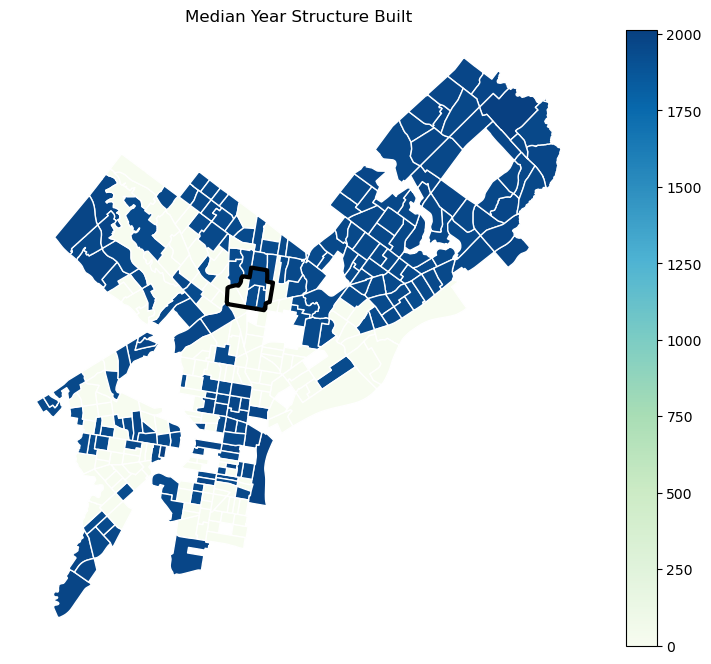

In [76]:
fig, ax = plt.subplots(figsize = (10,8)) 
pa_housing2.plot(column = 'Median Year Structure Built', legend=True,
    legend_kwds={'orientation': "vertical"},classification_kwds={'bins':[0.25, 0.5,0.75,1]},edgecolor='white',cmap = 'GnBu',ax=ax)
logan_boundary.geometry.boundary.plot(color=None,edgecolor='black',linewidth = 3,ax=ax)
ax.axis('off')
plt.title('Median Year Structure Built')

plt.savefig("Median Year Structure Built.png", transparent=True)

In [77]:
pa_housing2['pct_ownocc'] =pa_housing2['Owner-Occupied Housing Units']/pa_housing2['Housing Units']*100

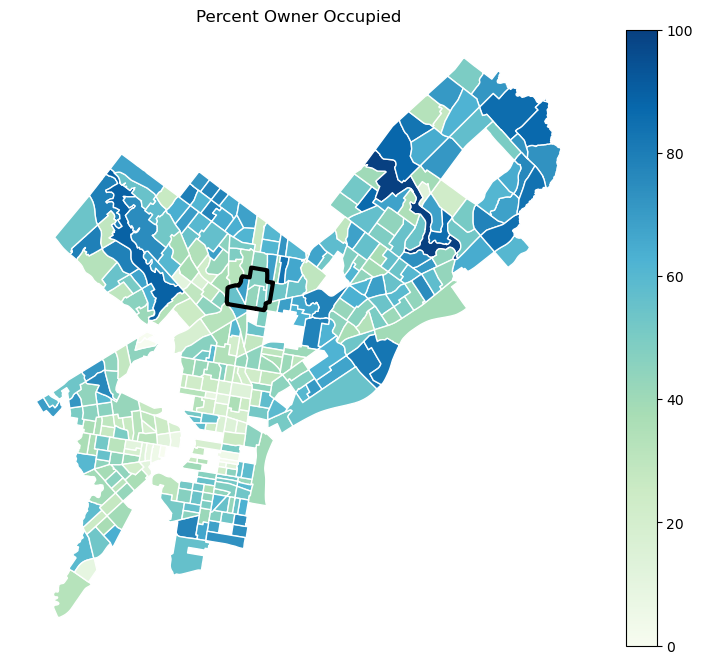

In [78]:
fig, ax = plt.subplots(figsize = (10,8)) 
pa_housing2.plot(column = 'pct_ownocc', legend=True,
    legend_kwds={'orientation': "vertical"},classification_kwds={'bins':[0.25, 0.5,0.75,1]},edgecolor='white',cmap = 'GnBu',ax=ax)
logan_boundary.geometry.boundary.plot(color=None,edgecolor='black',linewidth = 3,ax=ax)
ax.axis('off')
plt.title('Percent Owner Occupied')

plt.savefig("Percent Owner Occupied Units.png", transparent=True)

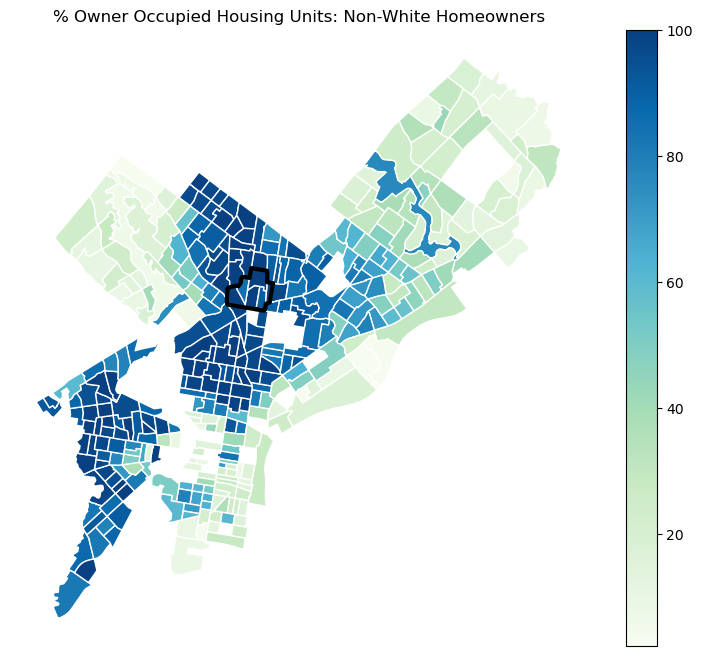

In [79]:
fig, ax = plt.subplots(figsize = (10,8)) 
pa_housing2.plot(column = '% Owner Occupied Housing Units: Non-White Homeowners', legend=True,
    legend_kwds={'orientation': "vertical"},classification_kwds={'bins':[0.25, 0.5,0.75,1]},edgecolor='white',cmap = 'GnBu',ax=ax)
logan_boundary.geometry.boundary.plot(color=None,edgecolor='black',linewidth = 3,ax=ax)
ax.axis('off')
plt.title('% Owner Occupied Housing Units: Non-White Homeowners')

plt.savefig("% Owner Occupied Housing Units: Non-White Homeowners.png", transparent=True)

In [ ]:
fig, ax = plt.subplots(figsize = (10,8)) 
pa_housing.plot(column = 'Median House Value for All Owner-Occupied Housing Units',legend=True,
  legend_kwds={'orientation': "vertical"},classification_kwds={'bins':[0.25, 0.5,0.75,1]},edgecolor='white',cmap = 'GnBu',ax=ax)
logan_boundary.geometry.boundary.plot(color=None,edgecolor='teal',linewidth = 3,ax=ax)
ax.axis('off')
plt.title('Median House Value for Owner-Occupied Units by Census Tract in Logan and Philadelphia')

plt.savefig("Median House Values Across Philadelphia Census Tracts.pdf", transparent=True)

#### Affordable Housing Projects ####

The next element to look at is dedicated affordable housing investment from the Phildelphia City Government. I learned that a loy og investment was spent on demolishing units and moving people from homes that were sinking, but where is the City spending its money in a productive and constructive effort to address housing stability? 

Pulling from the Open Philly Database, I am going to read in a dataset of affordable housing developments that were funded by Division of Housing and Community Development (DHCD) and built between 1994 to August 2019. In looking at the file, there were no geographic variables. However, there are addresses that could be geocoded to be mapped. There are also no city, state, or zip code fields, so in Excel I added a variable for City and State and added Philadelphia and PA because these are all afforable housing units in Philadelphia. I then looked up units that did not have clear addresses, and for sites that had multiple addresses but in the same development, I only included one address. There is another variable for the number of total units, and I would like to show dots in various sizes the correspond to the unit total of development, *but that is a next step.*

In [ ]:
dfah = pd.read_csv('data/ahclean.csv')

After reading in the new dataset, I have to get to work on getting these addresses into a mappable format. So, I import several libraries that can help me convert address data into lats and longs to map (thanks for the code @chris!). First, I need to put together the components that will make up a single address column, and then I am going to geocode to produce a lat, long to then map.


In [ ]:
import geopy
dir(geopy)
from geopy.geocoders import Photon
dir(Photon)
from geopy.geocoders import Nominatim
import time
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
from geopy import distance
import osmnx as ox
import contextily as ctx

In [ ]:
dfah['ADDRESS2'] = dfah['ADDRESS'] + ' ' + dfah['CITY'] + ' ' + dfah['STATE']

In [ ]:
dfah.sample()

It looks like the new address (ADDRESS2) worked! Now time to geocode these more complete addresses using ['ADDRESS2']. 

For this week, I will use one loop function here to geocode these addresses into lat, long format. 

In [ ]:
for index, row in dfah.iterrows():

    address = row['ADDRESS2']
    
    try:
        
        geocoded_address = ox.geocoder.geocode(address)

        dfah.at[index,'lat']=geocoded_address[0]
        dfah.at[index,'lon']=geocoded_address[1]

        
        print(address + ' geocoded to ' + str(geocoded_address[0])+' '+str(geocoded_address[1]))        

    except:
        print('Could not geocode '+ address)
        pass

To check the geocoding process, I use am going to see how many places mapped. I can see some locations, which included "scattered sites" housing did not provide an address, so they did not map. 

In [ ]:
dfah.info()

This clean up was successful in adding about 50 addresses to the previous midterm affordable housing map dataset with lat/long coordinates. The next step will be to convert the dataframe to a geodataframe to map! 

In [ ]:
gdah = gpd.GeoDataFrame(dfah, 
                       crs='epsg:4236',
                       geometry=gpd.points_from_xy(dfah.lon, dfah.lat))

Now that these points are mapped, I am going to use code to place the points on an initial map. I am also going to try to make this pretty using teal which is from our palette and a basic minimal base Stamen TonerLite. I am taking Yoh's advice to use 3857 vs. 4236, so I added in code to change the projection. I also continued to include the Logan boundary.

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

gdah.to_crs(3857).plot(ax=ax, 
        marker='o',
        markersize=10,
        alpha=0.4,
        color='darkblue')

ax.axis('off')


ax.set_title('Affordable Housing Projects in Philadelphia from 1994 to 2019')

logan_boundary.to_crs(3857).geometry.boundary.plot(color=None,edgecolor='teal',linewidth = 3,ax=ax)

ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite, crs=3857)
plt.savefig("affordablehousingprojects.png", transparent=True)

I also want to explore the projects to find additional details on them, so I am going to map these places on a folium map. So, I will need to make sure they are all geolocated and ready to be read in. I am going to set up a loop to start mapping my markers for each housing project. I will then drop rows that do not have values and create a new dataset.

In [ ]:
gdah2=gdah.dropna(subset=['lon'])
gdah2=gdah.dropna(subset=['lat'])

In [ ]:
gdah2.info()

Nice! So, again that cleaning results in 374 projects mapped. I am going to again, return to the data I included above on median home values and overlay the housing investments using folium. 

In [ ]:
m = folium.Map(location=[+39.99, -75.1652], 
               zoom_start = 11,
               tiles='Stamen Toner', 
               attribution='Stamen Toner')


folium.Choropleth(
                  geo_data=pa_housing, # geo data
                  data=pa_housing, # data          
                  key_on='feature.properties.FIPS', # key, or merge column
                  columns=['FIPS', 'Median House Value for All Owner-Occupied Housing Units'], # [key, value]
                  fill_color='GnBu',
                  line_weight=0.1, 
                  fill_opacity=0.8,
                  line_opacity=0.2, # line opacity (of the border)
                  legend_name='Home Values in Philadelphia (2021)').add_to(m)    # name on the legend color bar
m

Now, I want to overlay to layer the affordable housing development sites over the home values. I again, am going to use a loop to add a circle marker for each address. 

In [ ]:
for index, row in gdah2.iterrows():
 
    folium.CircleMarker([row.lat, row.lon], popup=row.PROJECT_NAME,color='darkgreen',fill_color='darkgreen',radius=3,weight=1).add_to(m)

m

Based on this map above, there are very few housing investments in the Logan Neighborhood area. There are fewer investments north of Erie Avenue and West of Broad Street. I am curious about these specific project types. 

#### Development Types ####

An interesting thing about the data from Philly is that it seems like they have affordable housing homeowner models, which is not usually the case in the US. I am going to make a quick bar chart of what types of housing projects these are and see if I can make three maps with the different data. Although there are some projects that I have the type data for but NOT the complete address data, I am going to just map projects with more complete data.

In [ ]:
gdah2.value_counts('PROJECT_TYPE')

I made a new variable for project count and will generate different maps based on these three different counts.

In [ ]:
project_count = gdah2['PROJECT_TYPE'].value_counts()
project_count

In my bar graph, I want to use the same color scheme as my maps and remove some of the more distracting features.

In [ ]:
fig, ax = plt.subplots(figsize=(6,4))

for spine in plt.gca().spines.values():
    spine.set_visible(False)

project_count.plot.bar(ax=ax,
                                      x='PROJECT_TYPE',
                                      y='project_count',
                                      legend=False,
                                      color='#1a4280ff',
                                       )
                                      
ax.set_ylabel('Project Count') # override y label
plt.title("Types of Affordable Housing Projects"); # multi-line title with padding

Now I am going to try to make a map that includes data for the three types of projects with a color code for each of the three projects. I chose a different color for each and I am going to overlay them on the static affordable housing project map by color.

In [ ]:
gdah2.loc[gdah2['PROJECT_TYPE'] == 'Rental', 'color'] = 'mediumaquamarine'
gdah2.loc[gdah2['PROJECT_TYPE'] == 'Special Needs', 'color'] = 'cornflowerblue'
gdah2.loc[gdah2['PROJECT_TYPE'] == 'Homeownership', 'color'] = 'navy'

In [ ]:
gdah2.sample(5)

Now that the color addition works, I am going to make out the projects by color and overlay the map of Logan. I will also need a legend, so I am including two new libraries to help make a custom legend.

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

gdah2.to_crs(3857).plot(ax=ax, 
        marker='o',
        markersize=10,
        color = gdah2.color)

ax.axis('off')
ax.set_title('Affordable Housing Projects in Philadelphia from 1994 to 2019')

logan_boundary.to_crs(3857).geometry.boundary.plot(color=None,edgecolor='teal',linewidth = 1,ax=ax)

ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite, crs=3857)
plt.savefig("affordablehousingprojectstype.png", transparent=True)

In [ ]:
def project_map(type):
  print(type + " is a "+gdah2.color+ " dot")

project_map(gdah2.PROJECT_NAME)



This loop identifies a specific project and what its particular color on the map is. Next would be to incorporate this into a legend. 

In [ ]:
# create a function
def project_by_type(PROJECT_TYPE='Rental'):
    
    # map
    ax = gdah2[gdah2.PROJECT_TYPE== PROJECT_TYPE].plot(figsize=(15,15),
        markersize=10 ,
        legend=True,
        alpha=0.8,
        color=gdah2.color)
    
    # zoom to extent of crime points total bounds
    minx,miny,maxx,maxy = gdah2.total_bounds

    # set the x and y limits manually
    ax.set_xlim(minx,maxx)
    ax.set_ylim(miny,maxy)

    # axis
    ax.axis('off')
    
    # title (including count)
    ax.set_title('Affordable' + ' (' + str(len(gdah2[gdah2.PROJECT_TYPE == PROJECT_TYPE])) + ' Units)',fontsize=8)

    # basemap
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite)



In [ ]:
# call the function for a different crime type
project_by_type('Homeownership')

In [ ]:
for PROJECT_TYPE in gdah2:
    project_by_type(gdah2.PROJECT_TYPE)

#### Neighborhood Resources

In [ ]:
dfresource = pd.read_csv('data/neighborhoodresources.csv')

In [ ]:
fig, ax = plt.subplots(figsize=(8,10))

gdah.to_crs(3857).plot(ax=ax, 
        marker='o',
        markersize=30,
        color='cornflowerblue',
        alpha=0.4)

ax.axis('off')


ax.set_title('Neighborhood Resources in Philadelphia')

logan_boundary.to_crs(3857).geometry.boundary.plot(color=None,edgecolor='teal',linewidth = 1,ax=ax)

ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite, crs=3857)
plt.savefig("phillyneighborhoodresources.png", transparent=True)

In [ ]:
gdfresource = gpd.GeoDataFrame(dfresource, 
                       crs='epsg:3857',
                       geometry=gpd.points_from_xy(dfresource.X, dfresource.Y))

In [ ]:
gdfresource2=gdfresource.dropna(subset=['X'])
gdfresource2=gdfresource.dropna(subset=['Y'])

In [ ]:
gdfresource2.info()

In [ ]:
m = folium.Map(location=[+39.99, -75.1652], 
               zoom_start = 11,
               tiles='Stamen Toner', 
               attribution='Stamen Toner')

m

In [ ]:
m = folium.Map(location=[+39.99, -75.1652], 
               zoom_start = 11,
               tiles='Stamen Toner', 
               attribution='Stamen Toner')


for index, row in gdfresource2.iterrows():
 
    folium.CircleMarker([row.Y, row.X], popup=row.AGENCY,color='teal',fill_color='green',radius=3,weight=3).add_to(m)
m


In [ ]:
m.save('resourcecenters.html')

#### Conclusions & Next Steps 

These were really helpful initial steps to understanding the housing situation at a very high level in Philadelphia and Logan. Our project has been framed around looking at investment vs. disinvestment in the neighborhood, and it seems like the low home values signal chronic disinvestment. It also seems like there have been few investments from the government in maintaining affordability in the neighborhood.

#### Evictions

I downloaded eviction data from Eviction Lab, but it is at the County level. 

In [ ]:
evictions = pd.read_csv('data/ccevictions.csv')

In [ ]:
evictions.head

In [ ]:
paevictions = evictions[evictions['fips_county']==42101]

In [ ]:
paevictions.head(20)

In [ ]:
paevictions['filingrate'] = paevictions['filings_observed']/paevictions['renting_hh']*100

In [ ]:
paevictions['filingrate'].head

In [ ]:
paevictions.head

In [ ]:
fig, ax = plt.subplots(figsize=(6,4))

for spine in plt.gca().spines.values():
    spine.set_visible(False)

paevictions['filingrate'].plot.bar(ax=ax,
                                      x='year',
                                      y='filingrate',
                                      legend=False,
                                      color='#1a4280ff',)
ax.set_xlabel('Year') # override y label                                      
ax.set_ylabel('Eviction Filing Rate') # override y label
plt.title("Change in Eviction Housing Rate by Year"); # multi-line title with padding

In [ ]:
import plotly.io as pio
import plotly.express as px

In [ ]:
paevictions['filingrate'].plot.bar(x='filingrate');

In [ ]:
# bar chart
fig = px.bar(paevictions,
        x='year',
        y='filingrate',
        title="Eviction Filings in "+'year', # title
        text_auto = True,
        height=600,
        width=900,
        color_discrete_sequence =['teal']*len('filingrate'), # single color for all the bars
        labels={
                'year': 'Year',
                'filingrate': 'Eviction Filing Rate',
        })

# bar label
fig.update_traces(textposition='outside',textfont_size=10,textfont_color='#444')

# axes labels
fig.update_yaxes(title_font_size=12,title_font_color='#aaa',tickfont_color='#aaa',tickfont_size=9)
fig.update_xaxes(title_font_size=10,title_font_color='#aaa',tickfont_color='#aaa',tickfont_size=9)

# show the figure
fig.show()
fig.write_html("evictionfilings_plotly.html")


In [ ]:
ejphilly = pd.read_csv(
    'data/ejdataphilly.csv',
    dtype=
    { 
        'ID':str
    }
)


In [ ]:
ejphilly.info()

In [ ]:
ejphilly['FIPS']=ejphilly['ID']
ejphilly['FIPS']

In [ ]:
pa_ej= tracts.merge(ejphilly,on='FIPS')

In [ ]:
fig, ax = plt.subplots(figsize = (10,8)) 
pa_ej.plot(column = 'PRE1960',legend=True,
  legend_kwds={'orientation': "vertical"},classification_kwds={'bins':[0.25, 0.5,0.75,1]},edgecolor='white',cmap = 'GnBu',ax=ax)
logan_boundary.geometry.boundary.plot(color=None,edgecolor='black',linewidth = 3,ax=ax)
ax.axis('off')
plt.title('Houses Built Pre-1960')

plt.savefig("Median House Values Across Philadelphia Census Tracts.png", transparent=True)

In [ ]:
fig, ax = plt.subplots(figsize = (10,8)) 
pa_ej.plot(column = 'PRE1960PCT',legend=True,
  legend_kwds={'orientation': "vertical"},classification_kwds={'bins':[0.25, 0.5,0.75,1]},edgecolor='white',cmap = 'GnBu',ax=ax)
logan_boundary.geometry.boundary.plot(color=None,edgecolor='black',linewidth = 3,ax=ax)
ax.axis('off')
plt.title('Percent Houses Built Pre-1960')
plt.savefig("Percent Houses Built Pre-1960.png", transparent=True)

In [ ]:
fig, ax = plt.subplots(figsize = (10,8)) 
pa_ej.plot(column = 'P_LDPNT',legend=True,
  legend_kwds={'orientation': "vertical"},classification_kwds={'bins':[0.25, 0.5,0.75,1]},edgecolor='white',cmap = 'GnBu',ax=ax)
logan_boundary.geometry.boundary.plot(color=None,edgecolor='black',linewidth = 3,ax=ax)
ax.axis('off')
plt.title('Percentile Lead Paint')
plt.savefig("Percentile Lead Paint.png", transparent=True)

In [ ]:
fig, ax = plt.subplots(figsize = (10,8)) 
pa_ej.plot(column = 'MINORPCT',legend=True,
  legend_kwds={'orientation': "vertical"},classification_kwds={'bins':[0.25, 0.5,0.75,1]},edgecolor='white',cmap = 'GnBu',ax=ax)
logan_boundary.geometry.boundary.plot(color=None,edgecolor='black',linewidth = 3,ax=ax)
ax.axis('off')
plt.title('Percent Racial Minorities')
plt.savefig("Percent Racial Minorities.png", transparent=True)

In [ ]:
fig, ax = plt.subplots(figsize = (10,8)) 
pa_ej.plot(column = 'CANCER',legend=True,
  legend_kwds={'orientation': "vertical"},classification_kwds={'bins':[0.25, 0.5,0.75,1]},edgecolor='white',cmap = 'GnBu',ax=ax)
logan_boundary.geometry.boundary.plot(color=None,edgecolor='black',linewidth = 3,ax=ax)
ax.axis('off')
plt.title('Air toxics cancer risk')
plt.savefig("Air toxics cancer risk.png", transparent=True)

In [ ]:
fig, ax = plt.subplots(figsize = (10,8)) 
pa_ej.plot(column = 'OZONE',legend=True,
  legend_kwds={'orientation': "vertical"},classification_kwds={'bins':[0.25, 0.5,0.75,1]},edgecolor='white',cmap = 'GnBu',ax=ax)
logan_boundary.geometry.boundary.plot(color=None,edgecolor='black',linewidth = 3,ax=ax)
ax.axis('off')
plt.title('Ozone')
plt.savefig("Ozone.png", transparent=True)

In [ ]:
fig, ax = plt.subplots(figsize = (10,8)) 
pa_ej.plot(column = 'P_PTSDF',legend=True,
  legend_kwds={'orientation': "vertical"},classification_kwds={'bins':[0.25, 0.5,0.75,1]},edgecolor='white',cmap = 'GnBu',ax=ax)
logan_boundary.geometry.boundary.plot(color=None,edgecolor='black',linewidth = 3,ax=ax)
ax.axis('off')
plt.title('Percentile for Hazardous waste proximity')
plt.savefig("Percentile for Hazardous waste proximity.png", transparent=True)

In [ ]:
fig, ax = plt.subplots(figsize = (10,8)) 
pa_ej.plot(column = 'OVER64PCT',legend=True,
  legend_kwds={'orientation': "vertical"},classification_kwds={'bins':[0.25, 0.5,0.75,1]},edgecolor='white',cmap = 'GnBu',ax=ax)
logan_boundary.geometry.boundary.plot(color=None,edgecolor='black',linewidth = 3,ax=ax)
ax.axis('off')
plt.title('Percentage of People 65+')
plt.savefig("Percentage of People 65.png", transparent=True)

In [ ]:
fig, ax = plt.subplots(figsize = (10,8)) 
pa_ej.plot(column = 'UNDER5PCT',legend=True,
  legend_kwds={'orientation': "vertical"},classification_kwds={'bins':[0.25, 0.5,0.75,1]},edgecolor='white',cmap = 'GnBu',ax=ax)
logan_boundary.geometry.boundary.plot(color=None,edgecolor='black',linewidth = 3,ax=ax)
ax.axis('off')
plt.title('Percentage of People Under 5')
plt.savefig("Percentage of People Under 5.png", transparent=True)

In [ ]:
pa_housing['pct_housingage'] =pa_housing['Occupied Housing Units']/pa_housing['Occupied Housing Units']*100
pa_housing['pct_housing2020'] =pa_housing['Occupied Housing Units: Built 2020 or Later']/pa_housing['Occupied Housing Units']*100
pa_housing['pct_housing2010']=pa_housing['Occupied Housing Units: Built 2010 to 2019']/pa_housing['Occupied Housing Units']*100
pa_housing['pct_housing2000']=pa_housing['Occupied Housing Units: Built 2000 to 2009']/pa_housing['Occupied Housing Units']*100
pa_housing['pct_housing1990']=pa_housing['Occupied Housing Units: Built 1990 to 1999']/pa_housing['Occupied Housing Units']*100
pa_housing['pct_housing1980']=pa_housing['Occupied Housing Units: Built 1980 to 1989']/pa_housing['Occupied Housing Units']*100
pa_housing['pct_housing1970']=pa_housing['Occupied Housing Units: Built 1970 to 1979']/pa_housing['Occupied Housing Units']*100
pa_housing['pct_housing1960']=pa_housing['Occupied Housing Units: Built 1960 to 1969']/pa_housing['Occupied Housing Units']*100
pa_housing['pct_housing1950']=pa_housing['Occupied Housing Units: Built 1950 to 1959']/pa_housing['Occupied Housing Units']*100
pa_housing['pct_housing1940']=pa_housing['Occupied Housing Units: Built 1940 to 1949']/pa_housing['Occupied Housing Units']*100
pa_housing['pct_housing1939']=pa_housing['Occupied Housing Units: Built 1939 or Earlier']/pa_housing['Occupied Housing Units']*100


In [ ]:
fig, ax = plt.subplots(figsize = (10,8)) 
pa_housing.plot(column = 'pct_housing1939',legend=True,
  legend_kwds={'orientation': "vertical"},classification_kwds={'bins':[0.25, 0.5,0.75,1]},edgecolor='white',cmap = 'GnBu',ax=ax)
logan_boundary.geometry.boundary.plot(color=None,edgecolor='black',linewidth = 3,ax=ax)
ax.axis('off')
plt.title('Percent Housing Units Built Before 1939 ')
plt.savefig("Percent Houses Built Before 1939.png", transparent=True)

### Mapping Landcare Sites ###

In [ ]:
dflandcare = pd.read_csv('data/communitylandcare.csv')

In [ ]:
dflandcare.head()

In [ ]:
dflandcare.info()

After my initial read in, I saw that just like the other Philadelphia DHCD file, the addresses did not include City or State, so when initially mapped, they came up all over the country. I downloaded the CSV and added Philadelphia as a CITY variable and Pennsylvania as a STATE variable and double checked these sites. There are over 2,200 projects, but the data will be helpful, especially because it shows the owner and includes the Phildelphia Land Bank. So, the edited file dflandcare_clean is read in now. 

In [ ]:
dflandcare_clean = pd.read_csv('data/communitylandcareown.csv')

In [ ]:
dflandcare_clean['ADDRESS2'] = dflandcare_clean['ADDRESS'] + ' ' + dflandcare_clean['CITY'] + ' ' + dflandcare_clean['STATE']

In [ ]:
dflandcare_clean.info()

In [ ]:
for index, row in dflandcare_clean.iterrows():

    address = row['ADDRESS2']
    
    try:
        
        geocoded_address = ox.geocoder.geocode(address)

        dflandcare_clean.at[index,'lat']=geocoded_address[0]
        dflandcare_clean.at[index,'lon']=geocoded_address[1]

        
        print(address + ' geocoded to ' + str(geocoded_address[0])+' '+str(geocoded_address[1]))        

    except:
        print('Could not geocode '+ address)
        pass

In [ ]:
gdflandcare_clean = gpd.GeoDataFrame(dflandcare_clean, 
                       crs='epsg:4236',
                       geometry=gpd.points_from_xy(dflandcare_clean.lon, dflandcare_clean.lat))

In [ ]:
gdflandcare_clean.info()

In [ ]:
gdflandcare_cleanfull = gdflandcare_clean.dropna(subset=['lat','lon'])


Here I drop values that could not be geocoded to make it easier to map. I made a new dataset, so I could keep the full set for other analysis. 

In [ ]:
gdflandcare_cleanfull.info()

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

gdflandcare_cleanfull.to_crs(3857).plot(ax=ax, 
        marker='o',
        markersize=10,
        alpha =0.4,
        color='seagreen')

ax.axis('off')


ax.set_title('Landcare Projects')

logan_boundary.to_crs(3857).geometry.boundary.plot(color=None,edgecolor='teal',linewidth = 3,ax=ax)

ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite, crs=3857)
plt.savefig("landcare.png", transparent=True)

In [ ]:
m = folium.Map(location=[+40.02456, -75.141496],
               zoom_start = 14,
               tiles='Stamen Toner', 
               attribution='Stamen Toner')
m

In [ ]:
for index, row in gdflandcare_cleanfull.iterrows():
 
    folium.CircleMarker([row.lat, row.lon], popup=row.ADDRESS,color='seagreen',fill_color='seagreen',radius=5,weight=1.5).add_to(m)
m

In [ ]:
gdflandcare_cleanfull.value_counts('OWNER1')

In [ ]:
gdflandcare_cleanfull['OWNERFULL'] = gdflandcare_cleanfull['OWNER1'] + ' ' + gdflandcare_cleanfull['OWNER2']
gdflandcare_cleanfull['OWNERFULL']

In [ ]:
gdflandcare_cleanfull.value_counts('OWNER1')

In [ ]:
landowner_count = gdflandcare_cleanfull['OWNER1'].value_counts()
landowner_count

In [ ]:
fig, ax = plt.subplots(figsize=(6,4))

for spine in plt.gca().spines.values():
    spine.set_visible(False)

landowner_count[:10].plot.bar(ax=ax,
                                      x='OWNER1',
                                      y='landowner_count',
                                      legend=False,
                                      color='#1a4280ff',
                                       )
                                      
ax.set_ylabel('Site Count') # override y label
plt.title("Owner of Sites for LandCare Projects"); # multi-line title with padding

In [ ]:
landowner_count.describe()

In [ ]:
gdflandcare_cleanfull['OWNER1'].describe()

In [ ]:
((312+148+138+54+13)/1305)*100

### Housing Data Census (Again) ###

I am returning to my initial work of analyzing census tract data for: median age, race of homeowner, and % renters.

In [ ]:
dfcensus2 = pd.read_csv(
    'data/censusdata2.csv',
    dtype=
    {
        'Geo_STATE':str,
        'Geo_COUNTY': str,
        'Geo_TRACT':str, 
        'Geo_FIPS':str
    }
)

In [ ]:
dfcensus2.head()

Mapping owner occupied units 

owner-occupied housing units: SE_A10045_001
housing units: SE_A10001_001

Below I am calculating % owner-occupied housing in a tract

In [ ]:
dfcensus2.Geo_FIPS

dfcensus2[columns_to_keep] = ['STATECE',
                   'STATE',
                   'COUNTY',
                   'PLACE',
                   'TRACT',
                   'FIPS',
                   'PLACESE',
                   'A10057_001',
                   'B10060_001',
                   'B10060_002',
                   'B10060_003',
                   'PCT_B10060_002',
                   'PCT_B10060_003',
                   'A10045_001',
                   'A10001_001',
                   'A03001B_001',
                   'PCT_A10010_002',
                   'PCT_A10010_003',
                   'PCT_A10010_004',
                   'PCT_A10010_005',
                   'PCT_A10010_006',
                   'PCT_A10010_007',
                   'PCT_A10010_008',
                   'PCT_A10010_009',
                   'PCT_A10010_010',
                  ]

dfcensus2[columns_to_keep]

columns = list(dfcensus2[columns_to_keep])
columns

columns = ['State Census',
                   'State FIPS',
                   'County',
                   'Place',
                   'Tract',
                   'FIPS',
                   'Place State FIPS',
                   'Median Year Structure Built',
                   'Owner Occupied Housing Units',
                   'Owner Occupied Housing Units: White Alone, Not Hispanic or Latino Homeowners',
                   'Owner Occupied Housing Units: Non-White Homeowners',
                   '% Owner Occupied Housing Units: White Alone, Not Hispanic or Latino Homeowners',
                   '% Owner Occupied Housing Units: Non-White Homeowners',
                   'Owner-Occupied Housing Units',
                   'Housing Units',
                   'Renter-Occupied Housing Units',
                   '% Households: with a Householder Who Is White Alone',
                   '% Households: with a Householder Who Is Black or African  American Alone',
                   '% Households: with a Householder Who Is American Indian and  Alaska Native Alone',
                   '% Households: with a Householder Who Is Asian Alone',
                   '% Households: with a Householder Who Is Native Hawaiian and  Other Pacific Islander Alone',
                   '% Households: with a Householder Who Is Some Other Race Alone',
                   '% Households: with a Householder Who Is Two or More Races',
                   '% Households: with a Householder Who Is Hispanic or Latino',
                   '% Households: with a Householder Who Is White Alone, Not  Hispanic or Latino',
                         ]

columns

In [ ]:
logan_housing2= tracts.merge(dfcensusfull,on='FIPS')

In [ ]:
logan_housing2.head()

In [ ]:
dfcensus2['pct_ownocc'] = (dfcensus2['Owner-Occupied Housing Units']/dfcensus2['Housing Units'])*100
